In [3]:
import tensorflow as tf

In [4]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU available, switching to CPU.")

# Computer Vision

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
model_dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,activation="relu"),
    tf.keras.layers.Dense(units=32,activation="relu"),
    tf.keras.layers.Dense(units=2,activation="softmax")
])
model_dense(tf.ones((2,2)))
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2, 64)                   192       
                                                                 
 dense_1 (Dense)             (2, 32)                   2080      
                                                                 
 dense_2 (Dense)             (2, 2)                    66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________


In [7]:
2*64+64

192

In [8]:
print("Number of weights:", 2*64+64+64*32+32+32*2+2)

Number of weights: 2338


In [9]:
tf.ones((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

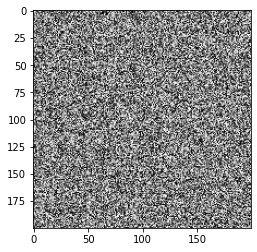

In [10]:
img = np.random.rand(200,200)
plt.imshow(img,cmap="gray")

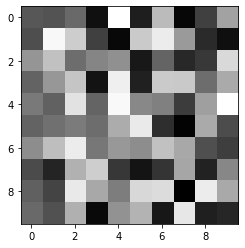

In [11]:
plt.imshow(img[:10,:10],cmap="gray")

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(400,400)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 160000)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               20480128  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 20,489,034
Trainable params: 20,489,034
Non-trainable params: 0
_________________________________________________________________


In [14]:
(200*200)*128+128+128*64+64+64*10+10

5129034

In [15]:
20489034

20489034

# Convolution

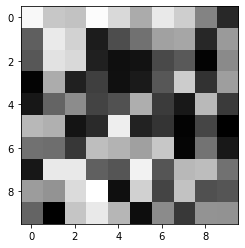

In [16]:
img = np.random.rand(10,10)
plt.imshow(img,cmap="gray")

In [17]:
kernel = np.array([
    [1,1,2,1,1],
    [3,0,0,1,1],
    [1,0,0,1,1]
]) # Strukturni element

(10, 10)
(10, 10)
(10, 10)


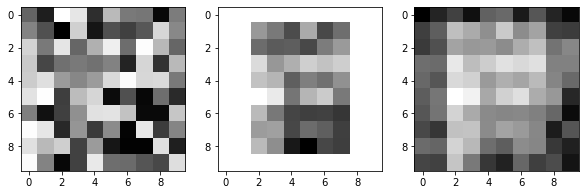

In [20]:
row_shift = kernel.shape[0]//2
column_shift = kernel.shape[1]//2

img_feature_map_valid = np.zeros(img.shape)
img_feature_map_valid[:] = np.nan
img_feature_map_same = np.zeros(img.shape)
img_feature_map_same[:] = np.nan

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        # valid
        if i>= row_shift and j>= column_shift and i<img.shape[0]-row_shift and j<img.shape[1]-column_shift:
            row_start = i-row_shift
            row_end = row_start+kernel.shape[0]
            column_start=j-column_shift
            column_end = column_start+kernel.shape[1]
            
            # print(row_start,row_end,column_start,column_end)
            
            current_matrix = img[row_start:row_end,column_start:column_end]
            value = np.sum(kernel*current_matrix)
            img_feature_map_valid[i,j] = value
        
        # same
        current_matrix = np.zeros(kernel.shape)
        for kernel_row, r in enumerate(range(i-row_shift,i+row_shift+1)):
            for kernel_column, c in enumerate(range(j-column_shift,j+column_shift+1)):
                if r>=0 and r<img.shape[0] and c>=0 and c<img.shape[1]:
                    current_matrix[kernel_row,kernel_column] = img[r,c]
        value = np.sum(kernel*current_matrix)
        img_feature_map_same[i,j] = value
        
        # same - with padding
        
        
        
print(img.shape)
print(img_feature_map_valid.shape)
print(img_feature_map_same.shape)


fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(img,cmap="gray")
axs[1].imshow(img_feature_map_valid,cmap="gray")
axs[2].imshow(img_feature_map_same,cmap="gray")

In [18]:
kernel.shape

(3, 5)

# GPU acceleration

In [19]:
import tensorflow as tf

In [21]:
# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# if physical_devices:
#    tf.config.experimental.set_memory_growth(physical_devices[0], True)
# else:
#    print("No GPU available, switching to CPU.")

# Convolution in Keras

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(inputs)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10,activation="softmax")(x)

model = keras.Model(inputs = inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In [25]:
32*(3*3)+32

320

In [26]:
3*3*1152

10368

# MNIST dataset

In [31]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [32]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [33]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

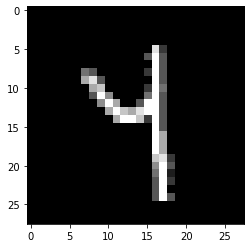

4


In [34]:
n = 1004
plt.imshow(train_images[n,:,:],cmap="gray")
plt.show()
print(train_labels[n])

In [36]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [37]:
model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [38]:
model.fit(train_images, train_labels, epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 5ms/step - loss: 0.7528 - accuracy: 0.7558
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2703 - accuracy: 0.9171
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1626 - accuracy: 0.9511
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1183 - accuracy: 0.9637
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0957 - accuracy: 0.9702


In [39]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0819 - accuracy: 0.9760


(0.08187267929315567, 0.9760000109672546)

In [40]:
# https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [37]:
import os
import shutil
import random
from tqdm.notebook import tqdm

# download from here: https://www.microsoft.com/en-us/download/details.aspx?id=54765

# Set the source directory where the images are stored
src_dir = './keggle/PetImages'

# Set the destination directory where the train, test, and split folders will be created
dest_dir = './keggle'

# Set the percentage of images to use for the test and split folders (the remaining percentage will be used for the train folder)
test_pct = 0.2
split_pct = 0.1 # validation

# Create the train, test, and split folders if they don't already exist
for folder in ['train', 'test', 'validation']:
    os.makedirs(os.path.join(dest_dir, folder, 'cat'), exist_ok=True)
    os.makedirs(os.path.join(dest_dir, folder, 'dog'), exist_ok=True)


# Iterate through the Cat and Dog folders in the source directory
for animal in ['Cat', 'Dog']:
    indx = 0
    
    animal_dir = os.path.join(src_dir, animal)
    filenames = os.listdir(animal_dir)

    # Shuffle the filenames randomly
    random.shuffle(filenames)

    # Calculate the number of images to use for the test and split folders
    num_images = len(filenames)
    num_test = int(num_images * test_pct)
    num_split = int(num_images * split_pct) # validation

    # Iterate through the filenames and move them to the appropriate folder
    for i, filename in enumerate(tqdm(filenames)):
        if i < num_test:
            dest_folder = 'test'
        elif i < num_test + num_split:
            if dest_folder == "test":
                indx=0
            dest_folder = 'validation'
        else:
            if dest_folder == "validation":
                indx=0
            dest_folder = 'train'
        # shutil.move(os.path.join(animal_dir, filename), os.path.join(dest_dir, dest_folder, f"{'cat' if animal=='Cat' else 'dog'}", f"{'cat' if animal=='Cat' else 'dog'}.{indx}.jpg"))
        shutil.move(os.path.join(animal_dir, filename), os.path.join(dest_dir, dest_folder, f"{'cat' if animal=='Cat' else 'dog'}", f"{indx}.jpg"))
        indx += 1

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [41]:
import os, shutil, pathlib
from tqdm.notebook import tqdm

original_dir = pathlib.Path("./keggle")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        # fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in tqdm(fnames):
            # print(fname, original_dir / category / fname)
            shutil.copyfile(src=original_dir / subset_name / category / fname,
                            dst=dir / fname)

# make_subset("train", start_index=0, end_index=1000)
# make_subset("validation", start_index=0, end_index=500)
# make_subset("test", start_index=0, end_index=1000)

In [42]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(64,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(128,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(256,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(512,3,activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

In [43]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [45]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [46]:
# from tensorflow.keras.utils import image_dataset_from_directory

# train_dataset = image_dataset_from_directory(
#     new_base_dir / "train",
#     image_size=(180, 180),
#     batch_size=32)
# validation_dataset = image_dataset_from_directory(
#     new_base_dir / "validation",
#     image_size=(180, 180),
#     batch_size=32)
# test_dataset = image_dataset_from_directory(
#     new_base_dir / "test",
#     image_size=(180, 180),
#     batch_size=32)

In [47]:
import tensorflow as tf
import os
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
import random

In [48]:
def preprocess_function(image_path, label):
    # Read the image using PIL library
    image = Image.open(image_path)
    
    # Resize the image to the desired shape
    image = np.array(image.resize((180, 180)))
    
    return image.astype(np.float32), np.float32(label)

In [49]:
def read_images(data_dir):

    # Get the file paths for all images in the cat and dog subfolders
    cat_images = [os.path.join(data_dir, "cat", filename) for filename in os.listdir(os.path.join(data_dir, "cat"))]
    dog_images = [os.path.join(data_dir, "dog", filename) for filename in os.listdir(os.path.join(data_dir, "dog"))]

    # Create labels for the cat and dog classes
    cat_labels = [0] * len(cat_images)
    dog_labels = [1] * len(dog_images)

    # Combine the image paths and labels
    image_paths = cat_images + dog_images
    labels = cat_labels + dog_labels

    all_images = []
    all_labels = []
    temp_data = list(zip(image_paths,labels))
    random.shuffle(temp_data)

    for path, label in tqdm(temp_data,desc=data_dir):
        image, label = preprocess_function(path,label)
        if image.shape == (180,180,3):
            all_images.append(image)
            all_labels.append(label)
    return all_images,all_labels

In [50]:
train_dataset = tf.data.Dataset.from_tensor_slices(read_images("./cats_vs_dogs_small/train/"))

./cats_vs_dogs_small/train/:   0%|          | 0/2000 [00:00<?, ?it/s]

In [51]:
test_dataset = tf.data.Dataset.from_tensor_slices(read_images("./cats_vs_dogs_small/test/"))

./cats_vs_dogs_small/test/:   0%|          | 0/2000 [00:00<?, ?it/s]

c:\users\fakulteta\appdata\local\programs\python\python39\lib\site-packages\PIL\TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [52]:
validation_dataset = tf.data.Dataset.from_tensor_slices(read_images("./cats_vs_dogs_small/validation/"))

./cats_vs_dogs_small/validation/:   0%|          | 0/1000 [00:00<?, ?it/s]

In [50]:
for imgs, labels in train_dataset.batch(32):
    print(imgs.shape, labels.shape)
    break

(32, 180, 180, 3) (32,)


In [51]:
np.min(imgs[:,:,:,:]), np.max(imgs[:,:,:,:])

(0.0, 255.0)

In [52]:
for imgs, labels in train_dataset.batch(320):
    print(imgs.shape, labels.shape)

(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(78, 180, 180, 3) (78,)


In [53]:
temp_dataset = np.random.normal(size=(1000,16))
temp_dataset = tf.data.Dataset.from_tensor_slices(temp_dataset)

In [54]:
for x in temp_dataset:
    print(x.shape)
    break

(16,)


In [55]:
temp_dataset_reshaped = temp_dataset.map(lambda x: tf.reshape(x,(4,4)))

In [56]:
for x in temp_dataset_reshaped:
    print(x.shape)
    break

(4, 4)


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


(<matplotlib.image.AxesImage at 0x23d7f7d09d0>,
 'cat',
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)

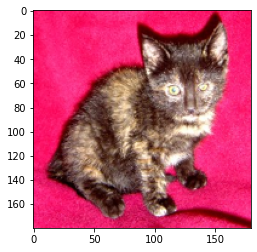

In [57]:
for data_batch, labels_batch in train_dataset.batch(32):
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
n = 20
plt.imshow(data_batch[n,:,:,:]/255), "dog" if labels_batch[n] == 1 else "cat", labels_batch[n]

In [53]:
callback = [
    keras.callbacks.ModelCheckpoint(
        filepath="./cehckpoints/convnet_from_scratch.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_dataset.batch(32),
    epochs = 30,
    validation_data=validation_dataset.batch(32),
    callbacks=callback
)

Epoch 1/30
63/63 [==============================] - 5s 56ms/step - loss: 0.7003 - accuracy: 0.5200 - val_loss: 0.6923 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 2s 39ms/step - loss: 0.6935 - accuracy: 0.5110 - val_loss: 0.6921 - val_accuracy: 0.5010
Epoch 3/30
63/63 [==============================] - 3s 46ms/step - loss: 0.6931 - accuracy: 0.5135 - val_loss: 0.6924 - val_accuracy: 0.5311
Epoch 4/30
63/63 [==============================] - 3s 46ms/step - loss: 0.6795 - accuracy: 0.5495 - val_loss: 0.6519 - val_accuracy: 0.6155
Epoch 5/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6363 - accuracy: 0.6306 - val_loss: 0.6187 - val_accuracy: 0.6376
Epoch 6/30
63/63 [==============================] - 3s 44ms/step - loss: 0.5826 - accuracy: 0.6817 - val_loss: 0.5972 - val_accuracy: 0.6797
Epoch 7/30
63/63 [==============================] - 3s 44ms/step - loss: 0.5334 - accuracy: 0.7337 - val_loss: 0.6004 - val_accuracy: 0.6857
Epoch 8/30
63

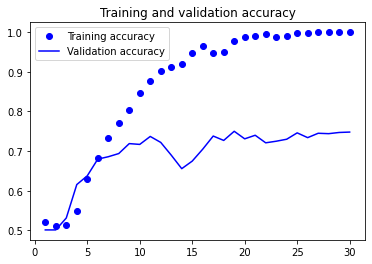

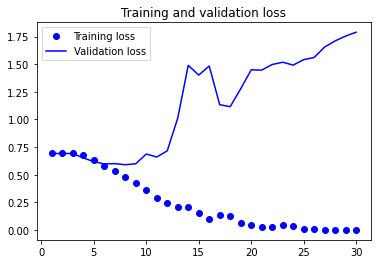

In [54]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [55]:
test_loss, test_acc = model.evaluate(test_dataset.batch(32))
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 19ms/step - loss: 1.6920 - accuracy: 0.7412
Test accuracy: 0.741


In [57]:
test_model = keras.models.load_model("./cehckpoints/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset.batch(32))
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 18ms/step - loss: 0.5775 - accuracy: 0.7151
Test accuracy: 0.715


In [58]:
for i,x in enumerate(train_dataset.batch(1)):
    pass
i

1997

In [60]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
    
])

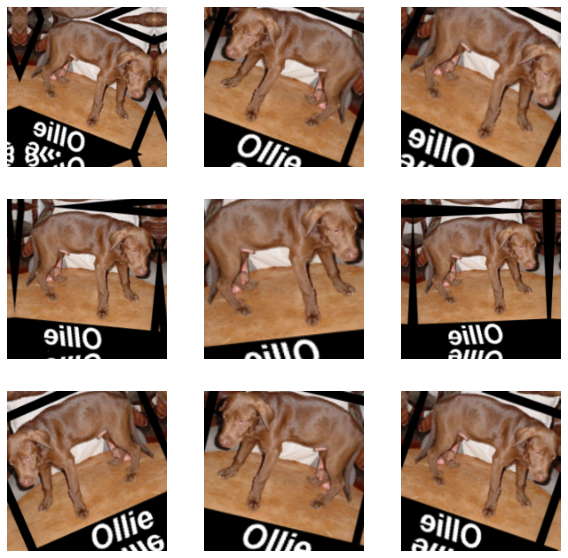

In [67]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.batch(32).take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy()/255)
        plt.axis("off")

In [68]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(64,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(128,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(256,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(512,3,activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [69]:
model.compile(
    loss = "binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [70]:
callback = [
    keras.callbacks.ModelCheckpoint(
        filepath="./cehckpoints/convnet_from_scratch_with_augmentations.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_dataset.batch(32),
    epochs = 30,
    validation_data=validation_dataset.batch(32),
    callbacks=callback
)

Epoch 1/30
63/63 [==============================] - 4s 50ms/step - loss: 0.6955 - accuracy: 0.5075 - val_loss: 0.6916 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6907 - accuracy: 0.5290 - val_loss: 0.6849 - val_accuracy: 0.5050
Epoch 3/30
63/63 [==============================] - 3s 47ms/step - loss: 0.6911 - accuracy: 0.5175 - val_loss: 0.6811 - val_accuracy: 0.5261
Epoch 4/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6732 - accuracy: 0.5966 - val_loss: 0.6539 - val_accuracy: 0.5964
Epoch 5/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6302 - accuracy: 0.6466 - val_loss: 0.6349 - val_accuracy: 0.6476
Epoch 6/30
63/63 [==============================] - 3s 46ms/step - loss: 0.5862 - accuracy: 0.6882 - val_loss: 0.6346 - val_accuracy: 0.6767
Epoch 7/30
63/63 [==============================] - 3s 46ms/step - loss: 0.5603 - accuracy: 0.7082 - val_loss: 0.6185 - val_accuracy: 0.6908
Epoch 8/30
63

In [71]:
test_model = keras.models.load_model("./cehckpoints/convnet_from_scratch_with_augmentations.keras")
test_loss, test_acc = test_model.evaluate(test_dataset.batch(32))
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 17ms/step - loss: 0.5626 - accuracy: 0.7432
Test accuracy: 0.743


## Leveraging a pretrained model

In [79]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top = False,
    input_shape=(180,180,3)
)

In [80]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [115]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [116]:
train_features, train_labels = get_features_and_labels(train_dataset.batch(32))

1/1 [==============================] - 0s 17ms/step


In [117]:
test_features, test_labels = get_features_and_labels(test_dataset.batch(32))

1/1 [==============================] - 0s 16ms/step


In [118]:
validation_features, validation_labels = get_features_and_labels(validation_dataset.batch(32))

1/1 [==============================] - 0s 14ms/step


In [120]:
train_features.shape, train_labels.shape

((1998, 5, 5, 512), (1998,))

In [121]:
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256,activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model = keras.Model(inputs,outputs)

model.compile(
    loss = "binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./cehckpoints/feature_extraction.keras",
        save_best_only = True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_features, train_labels,
    epochs=100,
    validation_data=(validation_features,validation_labels),
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 2s 27ms/step - loss: 2.5229 - accuracy: 0.9329 - val_loss: 0.9292 - val_accuracy: 0.9639
Epoch 2/100
63/63 [==============================] - 2s 37ms/step - loss: 0.6226 - accuracy: 0.9800 - val_loss: 0.7769 - val_accuracy: 0.9709
Epoch 3/100
63/63 [==============================] - 1s 8ms/step - loss: 0.4003 - accuracy: 0.9845 - val_loss: 0.9151 - val_accuracy: 0.9689
Epoch 4/100
63/63 [==============================] - 1s 11ms/step - loss: 0.2022 - accuracy: 0.9905 - val_loss: 0.8345 - val_accuracy: 0.9679
Epoch 5/100
63/63 [==============================] - 3s 45ms/step - loss: 0.2243 - accuracy: 0.9900 - val_loss: 1.3333 - val_accuracy: 0.9689
Epoch 6/100
63/63 [==============================] - 1s 9ms/step - loss: 0.1329 - accuracy: 0.9930 - val_loss: 0.9430 - val_accuracy: 0.9719
Epoch 7/100
63/63 [==============================] - 1s 9ms/step - loss: 0.0144 - accuracy: 0.9975 - val_loss: 0.9621 - val_accuracy: 0.9749
Epoch 8/1

63/63 [==============================] - 0s 6ms/step - loss: 0.1218 - accuracy: 0.9970 - val_loss: 5.6199 - val_accuracy: 0.9669
Epoch 59/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 0.9995 - val_loss: 4.4209 - val_accuracy: 0.9629
Epoch 60/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9990 - val_loss: 3.8047 - val_accuracy: 0.9669
Epoch 61/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0475 - accuracy: 0.9990 - val_loss: 4.8692 - val_accuracy: 0.9669
Epoch 62/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0352 - accuracy: 0.9985 - val_loss: 7.9175 - val_accuracy: 0.9598
Epoch 63/100
63/63 [==============================] - 0s 7ms/step - loss: 0.1437 - accuracy: 0.9985 - val_loss: 3.9766 - val_accuracy: 0.9669
Epoch 64/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0474 - accuracy: 0.9985 - val_loss: 5.2701 - val_accuracy: 0.9639
Epoch 65/100
63/63 

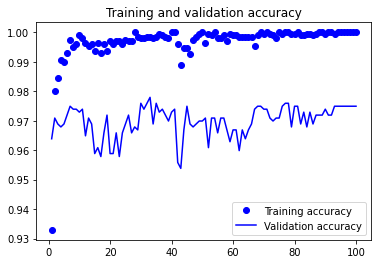

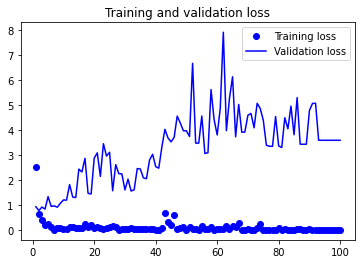

In [122]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Feature extraction together with data augmentation

In [124]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)

conv_base.trainable = False

In [126]:
conv_base.trainable = True
print(f"This is the number of trainable parameters before freezing them: {len(conv_base.trainable_weights)}")

This is the number of trainable parameters before freezing them: 26


In [129]:
conv_base.trainable = False
print(f"This is the number of trainable parameters after freezing them: {len(conv_base.trainable_weights)}")

This is the number of trainable parameters after freezing them: 0


In [134]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model = keras.Model(inputs,outputs)

# compile
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [135]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_8 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_3   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_3 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_12 (Flatten)        (None, 12800)             0  

In [144]:
# callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./cehckpoints/feature_extraction_with_data_augmentation.keras",
        save_best_only = True,
        monitor= "val_loss"
    )
]

model.fit(
    train_dataset.batch(32),
    epochs=5,
    validation_data=validation_dataset.batch(32),
    callbacks=callbacks
)

Epoch 1/5
63/63 [==============================] - 35s 550ms/step - loss: 4.6923 - accuracy: 0.9605 - val_loss: 5.5686 - val_accuracy: 0.9689
Epoch 2/5
63/63 [==============================] - 22s 352ms/step - loss: 4.3265 - accuracy: 0.9590 - val_loss: 6.2246 - val_accuracy: 0.9689
Epoch 3/5
63/63 [==============================] - 21s 326ms/step - loss: 3.1729 - accuracy: 0.9695 - val_loss: 5.8202 - val_accuracy: 0.9689
Epoch 4/5
63/63 [==============================] - 21s 336ms/step - loss: 2.7307 - accuracy: 0.9710 - val_loss: 5.2577 - val_accuracy: 0.9699
Epoch 5/5
63/63 [==============================] - 22s 349ms/step - loss: 2.5222 - accuracy: 0.9760 - val_loss: 4.9951 - val_accuracy: 0.9739


In [145]:
test_model = keras.models.load_model("./cehckpoints/feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset.batch(32))
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 12s 188ms/step - loss: 3.7940 - accuracy: 0.9749
Test accuracy: 0.975


In [146]:
for layer in model.layers[:-4]:
    # print(layer.trainable)
    layer.trainable = False

In [147]:
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
True
True
True
True


In [ ]:
# fine tuning